# Basic way to click points on images

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
import matplotlib.pyplot as plt
import os
import sys
import imageio
import numpy as np

In [2]:
def open(image):
    fig1 = plt.figure(figsize=(10,6))
    ax = fig1.add_subplot(111)
    ax.imshow(image)
    text=ax.text(10,10, "", va="top", ha="left", color='w')

    landmarks = []
    timestamp = [0]
    def onclick(event):
        if event.button==3:
            landmarks.append([event.xdata, event.ydata])
            timestamp.append(timestamp[-1]+1)
            l = np.float32(landmarks)
            ax.plot(l[:,0], l[:,1], 'r.')
            
            text.set_text("{}\n{}".format(len(l), np.around(l, 1)))

    cid = fig1.canvas.mpl_connect('button_press_event', onclick)
    plt.show() # show() must be called after mpl_connect!
    
    return landmarks, timestamp[:-1]

In [3]:
views = ["cam0", 'cam1', 'cam2']
image1 = imageio.imread("../examples/simple_box/frame_0001.jpg")
image2 = imageio.imread("../examples/simple_box/frame_0003.jpg")
image3 = imageio.imread("../examples/simple_box/frame_0010.jpg")

<IPython.core.display.Javascript object>


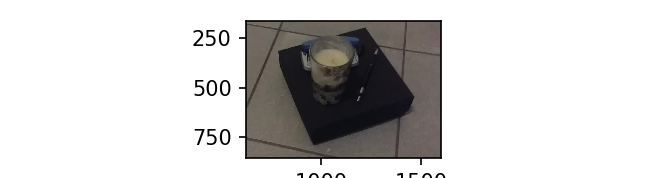

In [4]:
landmarks1, timestamp1 = open(image1)

In [55]:
landmarks1, timestamp1

([[789.5414956011731, 217.93097503751608],
  [572.696423176042, 738.8578668767755],
  [1361.0883980938415, 910.0205847194816],
  [1411.1622983870968, 316.0405260684555],
  [785.1170629102082, 316.6620262334575],
  [957.5660614816144, 708.7546874674822],
  [1464.9244632383743, 550.6971842279584],
  [1219.9407004957407, 204.34895372671767],
  [1184.7958918098032, 566.3825065692698],
  [1284.6433991411814, 304.53751285330856],
  [1064.5713421658986, 357.5178228658766]],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

<IPython.core.display.Javascript object>


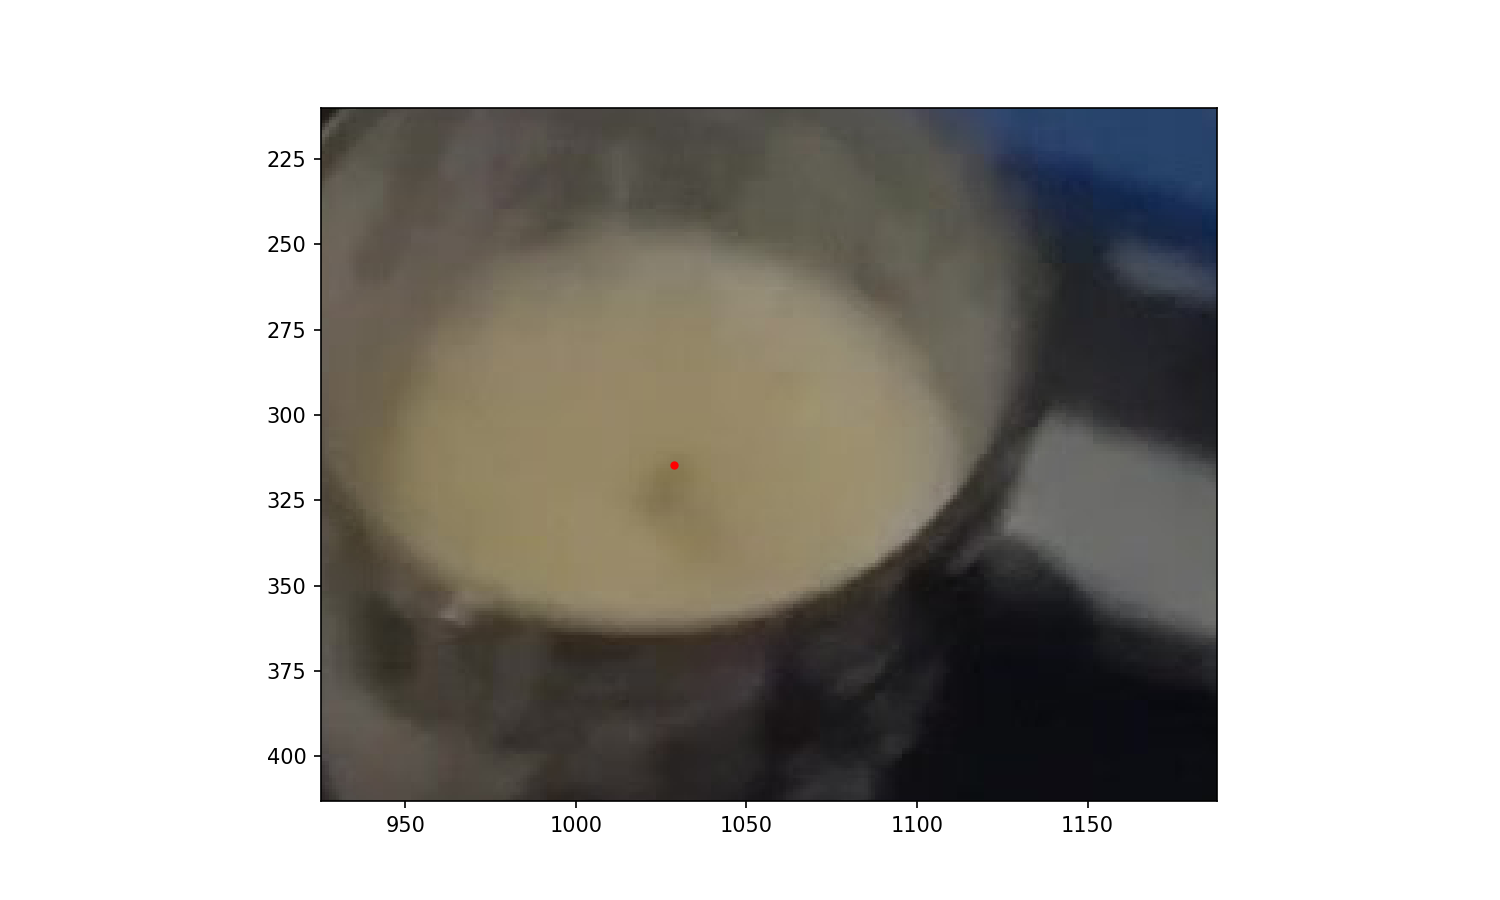

In [29]:
landmarks2, timestamp2 = open(image2)

In [56]:
landmarks2, timestamp2

([[1045.8748769375784, 59.32912056151446],
  [577.7388440860216, 468.6916862569831],
  [1141.7062011241446, 958.9289427511285],
  [1606.678132418657, 406.87196746834695],
  [926.2362458106409, 162.54885793876895],
  [838.6685876623375, 594.2204121909683],
  [1419.6264715123586, 667.8313890831911],
  [1426.573978843737, 206.23347231765464],
  [1117.748811269376, 565.2404880646736],
  [1409.7196533305403, 337.46805404707845],
  [1028.7495836824464, 314.6041264553576]],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

<IPython.core.display.Javascript object>


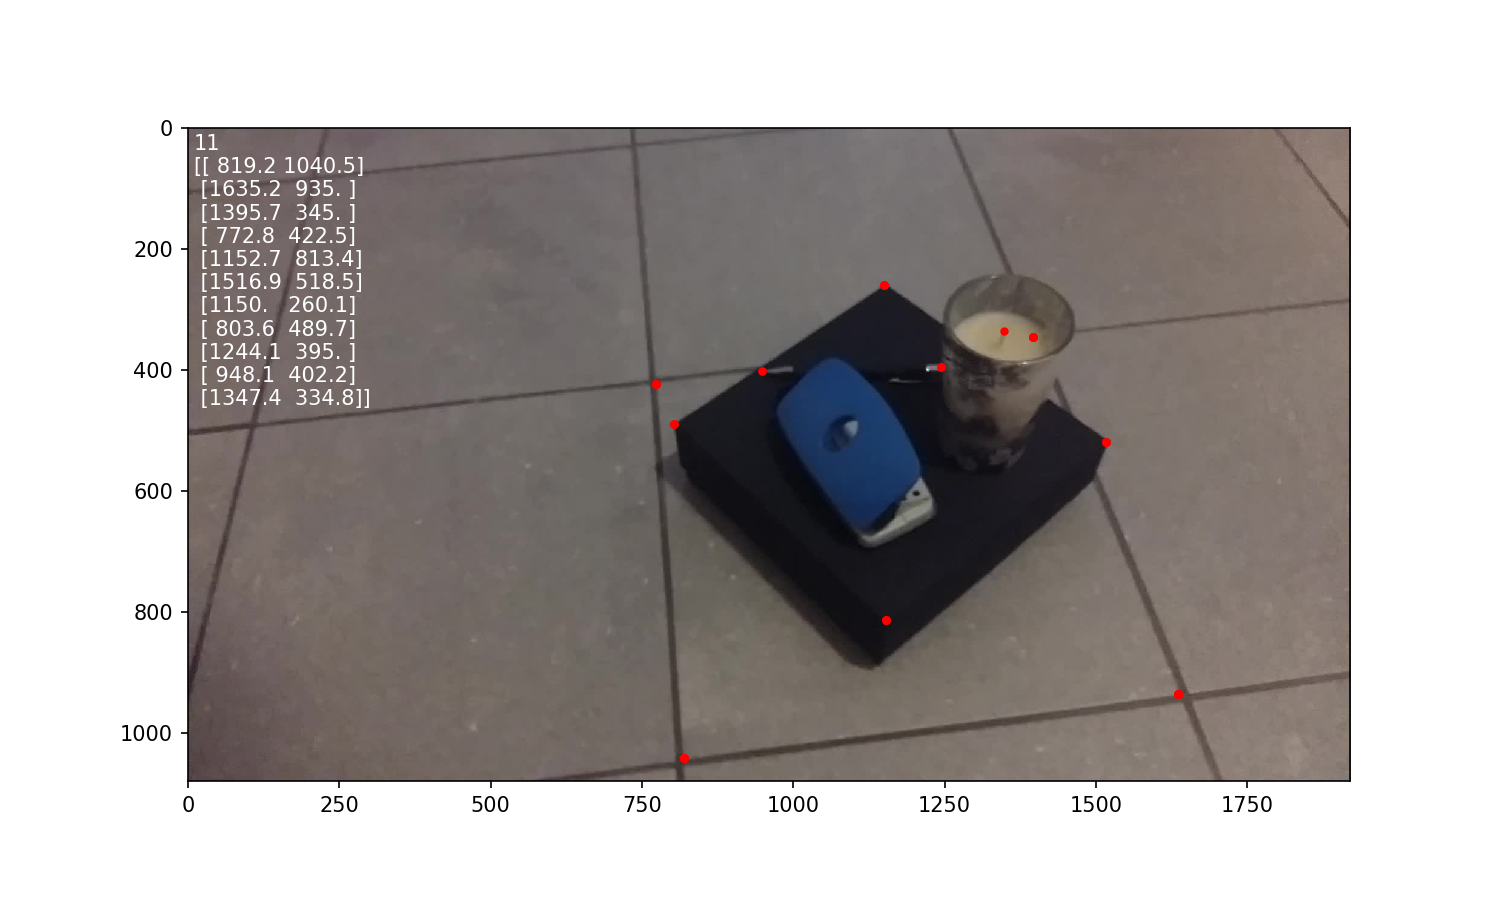

In [38]:
landmarks3, timestamp3 = open(image3)

In [57]:
landmarks3, timestamp3

([[819.1776477649114, 1040.5174649232627],
  [1635.1538594470048, 935.0416290564469],
  [1395.680348415026, 344.9500114748822],
  [772.8255498533724, 422.47893689670576],
  [1152.6798936950147, 813.4162473930289],
  [1516.9085043988268, 518.5345267108457],
  [1150.0392220011172, 260.09375024696203],
  [803.6038227901131, 489.72853869153295],
  [1244.1235372154727, 395.00579512145595],
  [948.1201857282502, 402.2414326022547],
  [1347.406010857422, 334.7507031467771]],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [58]:
landmarks = {
    views[0]:{"landmarks":landmarks1, "timestamp":timestamp1},  
    views[1]:{"landmarks":landmarks2, "timestamp":timestamp2}, 
    views[2]:{"landmarks":landmarks3, "timestamp":timestamp3}, 
}
landmarks

{'cam0': {'landmarks': [[789.5414956011731, 217.93097503751608],
   [572.696423176042, 738.8578668767755],
   [1361.0883980938415, 910.0205847194816],
   [1411.1622983870968, 316.0405260684555],
   [785.1170629102082, 316.6620262334575],
   [957.5660614816144, 708.7546874674822],
   [1464.9244632383743, 550.6971842279584],
   [1219.9407004957407, 204.34895372671767],
   [1184.7958918098032, 566.3825065692698],
   [1284.6433991411814, 304.53751285330856],
   [1064.5713421658986, 357.5178228658766]],
  'timestamp': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]},
 'cam1': {'landmarks': [[1045.8748769375784, 59.32912056151446],
   [577.7388440860216, 468.6916862569831],
   [1141.7062011241446, 958.9289427511285],
   [1606.678132418657, 406.87196746834695],
   [926.2362458106409, 162.54885793876895],
   [838.6685876623375, 594.2204121909683],
   [1419.6264715123586, 667.8313890831911],
   [1426.573978843737, 206.23347231765464],
   [1117.748811269376, 565.2404880646736],
   [1409.7196533305403, 33

In [59]:
from multiview_calib import utils
utils.json_write("../examples/simple_box/landmarks.json", landmarks)